<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/HW6/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Synthetic data

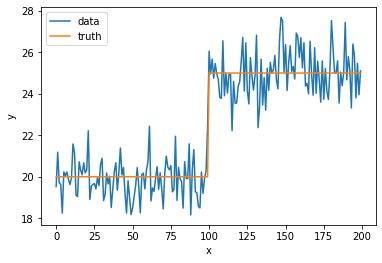

In [2]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

Fig. 1.

## Single POC - difference of means

In [5]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))

poc: 100.00, mean before: 19.89, mean after: 25.02


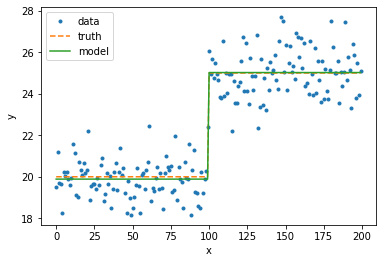

In [6]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Fig. 2.

# Single POC - MSE

In [51]:
def mse(y):
  N = len(y)
  sq_errors = []
  f = np.nanmean
  for i in range(0, N):
    sq_errors.append((y[i] - f(y[i:]))**2)
  mse = sum(sq_errors)/N
  return mse

def poc_mse(y):
  ''' minimizing MSE'''
  N = len(y)
  f = np.nanmean
  mse_all = mse(y)
  poc, before, after = 0, np.nan, np.nan  
  for i in range(1, N):
    mse_before = mse(y[:i])
    mse_after = mse(y[i:])
    mse_sum = mse_before + mse_after
    if mse_all > mse_sum:
      mse_all = mse_sum
      poc = i
      before, after = f(y[:i]), f(y[i:])
  return poc, before, after   

In [52]:
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))

poc: 100.00, mean before: 19.89, mean after: 25.02


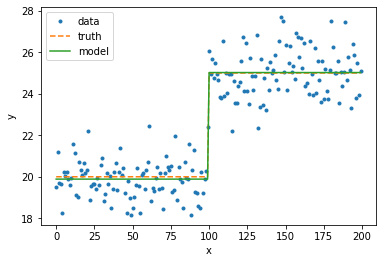

In [53]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Fig. 3.

## Single POC - diff of variance

In [93]:
mu1 = 20
s1, s2 = 1, 4 #variance or standard deviation? 
ys = np.concatenate([np.random.randn(100) + mu1 , np.random.randn(100) * s2 + mu1])

In [94]:
def maxdiff(y, sigma):
  N = len(y)
  f = np.nanmean
  poc, var, before, after = 0, 0, np.nan, np.nan
  for i in range(1, N):
    var_before = np.var(y[:i])
    var_after = np.var(y[i:])
    var_diff = abs(var_before - var_after)
    if var < var_diff:
      var = var_diff
      poc = i
      before, after = np.std(y[:i]), np.std(y[i:])
  return(poc, before, after)

In [95]:
print("poc: {:.2f}, standard deviation before: {:.2f}, standard deviation after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))

poc: 102.00, standard deviation before: 0.96, standard deviation after: 3.18


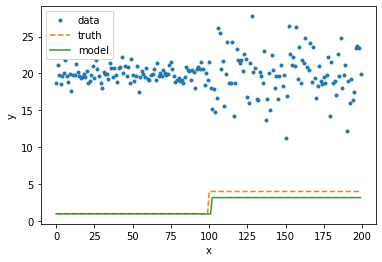

In [96]:
poc, before, after = maxdiff(ys, sigma=True)   
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [s1] * 100 + [s2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Fig. 4.

## Find POC with rupture python package

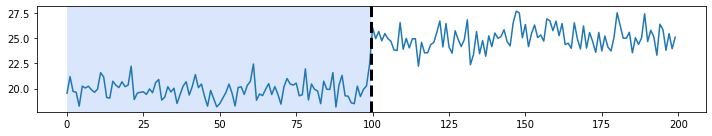

In [106]:
# detection for ym time series
algo = rpt.Pelt(model='rbf').fit(ym)
result = algo.predict(pen=5)

# display
rpt.display(ym, [100], result)
pl.show()

Fig. 5.

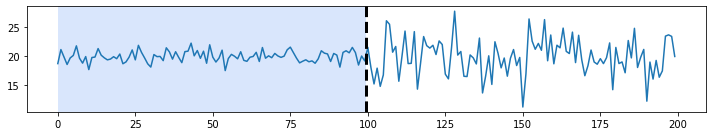

In [104]:
# detection for ys time series
algo = rpt.Pelt(model='rbf').fit(ys)
result = algo.predict(pen=5)

# display
rpt.display(ys, [100], result)
pl.show()

Fig. 6.

# The data from LANL earthquake prediction

In [107]:
eq1 = pd.read_csv('http://fbb.space/mltsa/LALNeq.csv')
eq1.describe()

,Unnamed: 0,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06,4.500000e+06
mean,2.250000e+06,4.616407e+00,8.852012e-01
std,1.299038e+06,2.614006e+01,3.374432e-01
min,0.000000e+00,-4.621000e+03,3.008971e-01
25%,1.125000e+06,2.000000e+00,5.934956e-01
50%,2.250000e+06,5.000000e+00,8.849986e-01
75%,3.374999e+06,7.000000e+00,1.177597e+00
max,4.499999e+06,3.252000e+03,1.469100e+00


In [117]:
eq1 = eq1[['acoustic_data', 'time_to_failure']]

In [118]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [ ]:
algo1 = rpt.Dynp
result = algo1.predict(n_bkps=1)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()

Explain Dynp search method